# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with Continuous-Control environment.

### 1. Import the Necessary Packages

In [1]:
from unityagents import UnityEnvironment
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

### 2. Instantiate the Environment and Agent

In [2]:
file_name   = r'D:\deep-reinforcement-learning\p2_continuous-control\20-Reacher_Windows_x86_64\Reacher.exe'
env         = UnityEnvironment(file_name=file_name)  # open environment
brain_name  = env.brain_names[0]                     # get the default brain
brain       = env.brains[brain_name]
env_info    = env.reset(train_mode=True)[brain_name] # reset the environment
num_agents  = len(env_info.agents)                   # number of agents
action_size = brain.vector_action_space_size         # size of each action
states      = env_info.vector_observations           # examine the state space 
state_size  = states.shape[1]
# create the agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=4)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

Episode 200	Average Score: 33.22	Score: 31.25

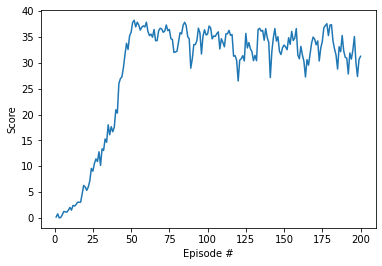

In [3]:
def ddpg(n_episodes=200):
    scores_deque      = deque(maxlen=100) # last 100 scores
    scores            = []                # all scores       
    max_average_score = 0                 # max average score
    for i_episode in range(1, n_episodes+1):
        agent.reset()                                           # reset noise    
        env_info       = env.reset(train_mode=True)[brain_name] # reset the environment    
        states         = env_info.vector_observations           # get the current state
        episode_scores = np.zeros(num_agents)                   # initialize the score
        while True:
            actions     = agent.act(states)                     # select an action
            env_info    = env.step(actions)[brain_name]         # send action to tne environment
            next_states = env_info.vector_observations          # get next state
            rewards     = env_info.rewards                      # get reward
            dones       = env_info.local_done                   # see if episode finished
            agent.step(states, actions, rewards, next_states,
                       dones)                                   # Save experience and learn
            episode_scores += rewards                           # update the score
            states          = next_states                       # roll over state to next time step
            if np.any(dones):                                   # exit loop if episode finished
                break
        score = np.mean(episode_scores)                         # mean episode score
        scores_deque.append(score)      
        scores.append(score)
        average_score = np.mean(scores_deque)                   # average score
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, average_score, score), end="")
        if average_score > max_average_score and average_score >= 30:
            # Save best agent
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        max_average_score = max(max_average_score, average_score)
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [6]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

agent.reset()                                            # reset noise    
env_info       = env.reset(train_mode=False)[brain_name] # reset the environment    
states         = env_info.vector_observations            # get the current state
episode_scores = np.zeros(num_agents)                    # initialize the score
while True:
    actions         = agent.act(states)             # select an action
    env_info        = env.step(actions)[brain_name] # send action to tne environment
    next_states     = env_info.vector_observations  # get next state
    rewards         = env_info.rewards              # get reward
    dones           = env_info.local_done           # see if episode finished
    episode_scores += rewards                       # update the score
    states          = next_states                   # roll over state to next time step
    score           = np.mean(episode_scores)
    print('\rScore: {:.2f}'.format(score), end="")
    if np.any(dones):                               # exit loop if episode finished
        break

Score: 35.83

In [7]:
env.close()